In [30]:
# Import libraries, wine data sets, add a label column to both df1 and df2 indicating a label 'red' or 'white' and combine them.
library(ggplot2)
library(cluster)
df1 <- read.csv("winequality-red.csv", sep = ";")
df2 <- read.csv("winequality-white.csv", sep = ";")
df1$label <- sapply(df1$pH, function(x) {
    "red"
})
df2$label <- sapply(df2$pH, function(x) {
    "white"
})
wine <- rbind(df1, df2)
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : chr  "red" "red" "red" "red" ...


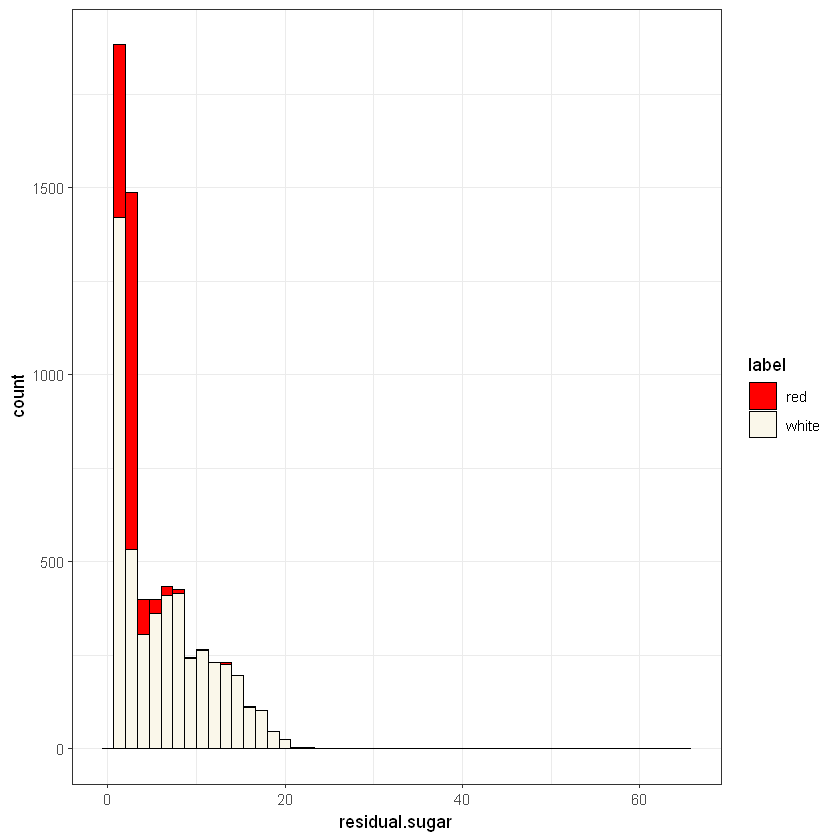

In [31]:
# Histogram of residual sugar
ggplot(wine, aes(residual.sugar)) +
    geom_histogram(aes(fill = label), color = "black", bins=50) +
    scale_fill_manual(values = c("red", "#faf7ea")) +
    theme_bw()

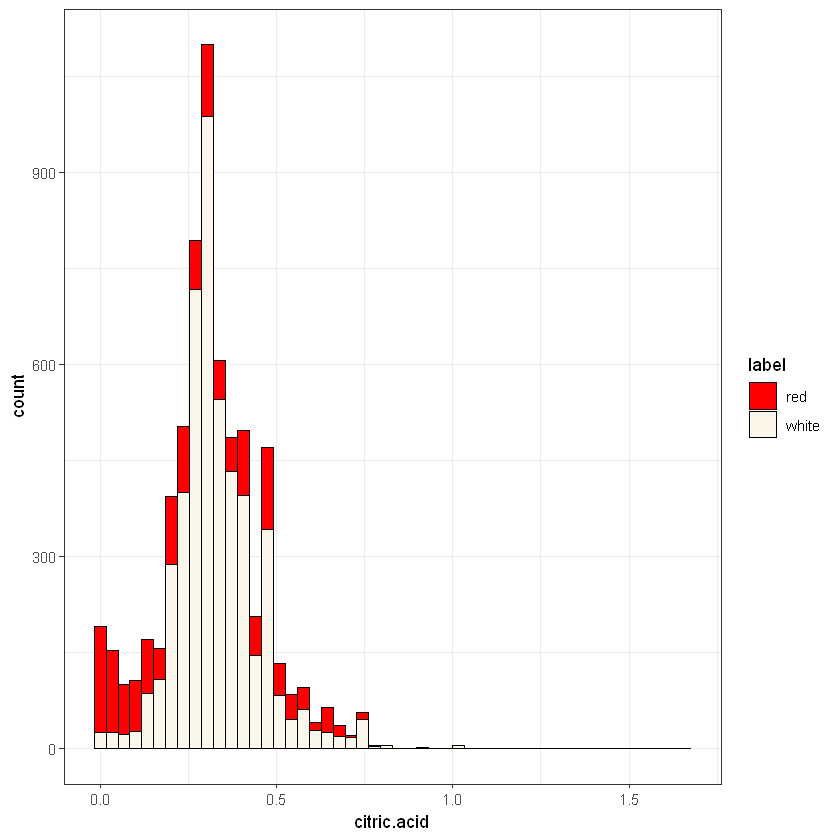

In [32]:
# Histogram of citric.acid
ggplot(wine, aes(citric.acid)) +
    geom_histogram(aes(fill = label), color = "black", bins=50) +
    scale_fill_manual(values = c("red", "#faf7ea")) +
    theme_bw()

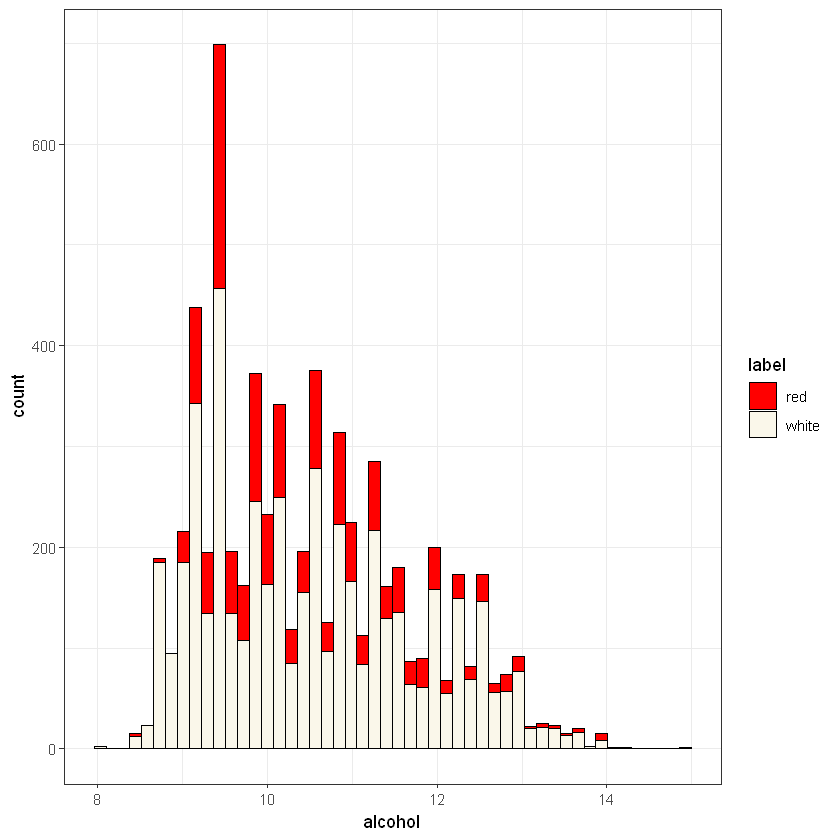

In [33]:
# Histogram of alcohol
ggplot(wine, aes(alcohol)) +
    geom_histogram(aes(fill = label), color = "black", bins=50) +
    scale_fill_manual(values = c("red", "#faf7ea")) +
    theme_bw()

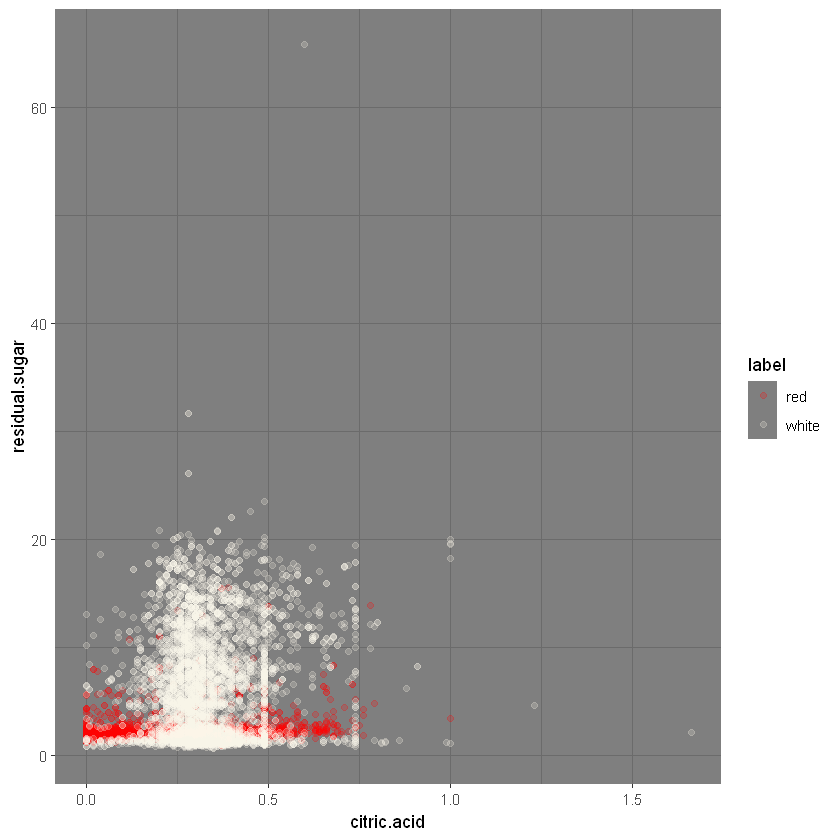

In [34]:
# Scatterplot of residual.sugar versus citric.acid
ggplot(wine, aes(x = citric.acid, y = residual.sugar)) +
    geom_point(aes(color = label), alpha=0.2) +
    scale_color_manual(values = c("red", "#faf7ea")) +
    theme_dark()

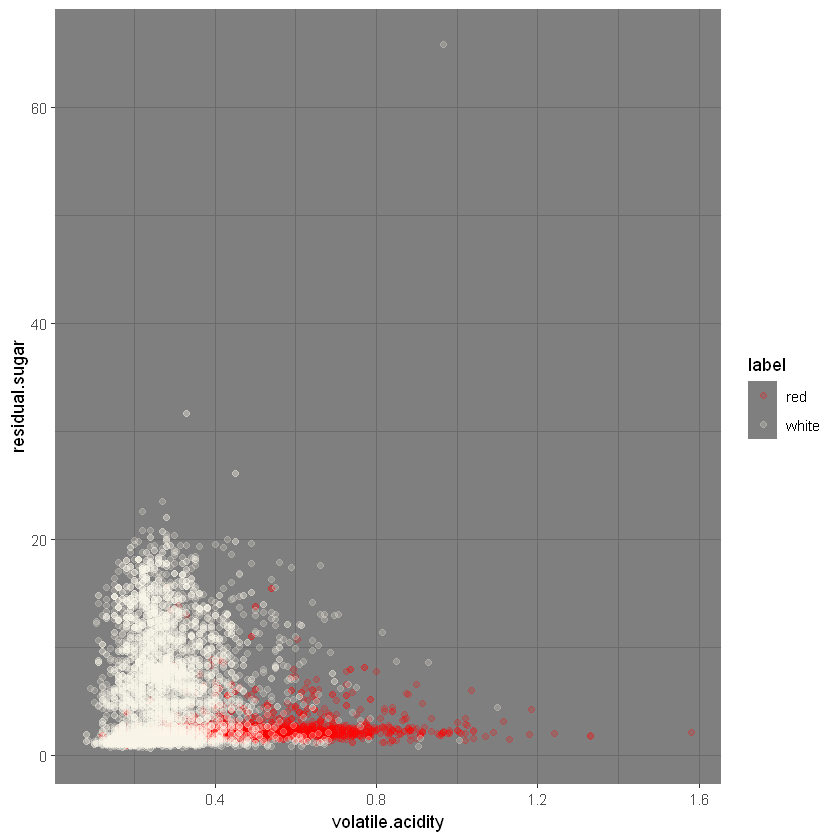

In [35]:
# Scatterplot of volatile.acidity versus residual.sugar
ggplot(wine, aes(x = volatile.acidity, y = residual.sugar )) +
    geom_point(aes(color = label), alpha=0.2) +
    scale_color_manual(values = c("red", "#faf7ea")) +
    theme_dark()

In [36]:
# Grab wine data without the label and call it clus.data
clus.data <- subset(wine, select = -label)
print(head(clus.data))

  fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1           7.4             0.70        0.00            1.9     0.076
2           7.8             0.88        0.00            2.6     0.098
3           7.8             0.76        0.04            2.3     0.092
4          11.2             0.28        0.56            1.9     0.075
5           7.4             0.70        0.00            1.9     0.076
6           7.4             0.66        0.00            1.8     0.075
  free.sulfur.dioxide total.sulfur.dioxide density   pH sulphates alcohol
1                  11                   34  0.9978 3.51      0.56     9.4
2                  25                   67  0.9968 3.20      0.68     9.8
3                  15                   54  0.9970 3.26      0.65     9.8
4                  17                   60  0.9980 3.16      0.58     9.8
5                  11                   34  0.9978 3.51      0.56     9.4
6                  13                   40  0.9978 3.51      0.56 

  fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1      7.619044        0.4079451   0.2911080       3.082690 0.0656846
2      6.904698        0.2871364   0.3398094       7.259286 0.0486092
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            18.43735             63.54832 0.9945680 3.255147 0.5718655
2            39.82503            155.90101 0.9947956 3.190308 0.5000354
   alcohol  quality
1 10.79529 5.809204
2 10.25832 5.825436


       
           1    2
  red   1515   84
  white 1310 3588

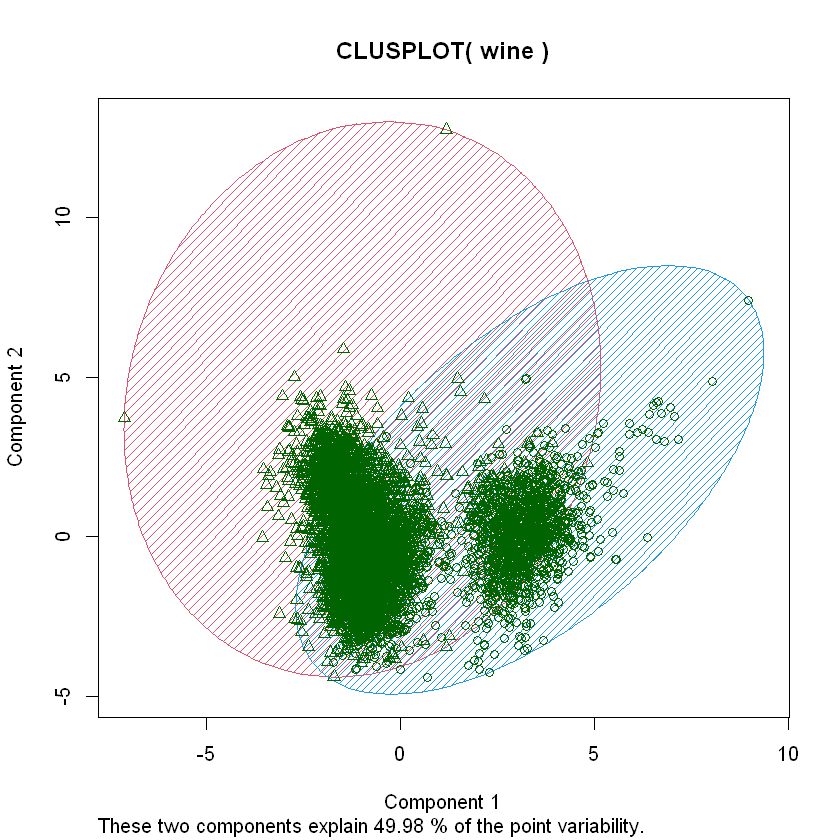

In [37]:
# Build the clusters by using kmeans function on clus.data and assign the results to wine.cluster.
# Compare the results with the table of wine$label and wine.cluster$cluster
# Use clusplot function to plot the clusters
wine.cluster <- kmeans(wine[1:12], 2)
print(wine.cluster$centers)
table(wine$label, wine.cluster$cluster)
clusplot(wine, wine.cluster$cluster, color = TRUE, shade = TRUE, labels = 0, lines = 0)